In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set


<function seaborn.rcmod.set(*args, **kwargs)>

In [202]:
df = pd.read_csv('./heart.csv')

In [203]:
df.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
0,63,Male,typical,145,233,1,left ventricular hypertrophy,150,0,2.3,3,0.0,fixed,0
1,67,Male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,2,3.0,normal,1
2,67,Male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,2,2.0,reversable,1
3,37,Male,nonanginal,130,250,0,normal,187,0,3.5,3,0.0,normal,0
4,41,Female,nontypical,130,204,0,left ventricular hypertrophy,172,0,1.4,1,0.0,normal,0


In [204]:
df.drop(['fbs','exang','old_peak','slope','ca'], axis = 1, inplace = True)

In [206]:
df.head()

,age,sex,chest_pain,rest_bp,chol,rest_ecg,max_hr,thal,disease
0,63,Male,typical,145,233,left ventricular hypertrophy,150,fixed,0
1,67,Male,asymptomatic,160,286,left ventricular hypertrophy,108,normal,1
2,67,Male,asymptomatic,120,229,left ventricular hypertrophy,129,reversable,1
3,37,Male,nonanginal,130,250,normal,187,normal,0
4,41,Female,nontypical,130,204,left ventricular hypertrophy,172,normal,0


A brief explanation of the terms in this dataframe for my non-medical colleagues that will read this.


chest_pain: Chest pain is pain or discomfort in the chest, typically the front of the chest. It may be described as sharp, dull, pressure, heaviness or squeezing.


    1) Typical Chestpain: This is a kind of severe chestpain that is typical of an heart attack, it is usually worsened by stress and/or emotion and is usually at the centre of the chest behind the breastbone.
    
    2) ATypical: This is opposite to the typical chestpain. It is characterised sharpness, stabbing, or tearing, in a specific area of the chest, and may last for hours or days.
    
    3) Asymptomatic: This means it is neither causing nor exhibiting symptoms of heart disease(burning sensation) while in the actual sense, there might or might not be the presence of heart disease.
    
    4) Anginal : This kind of chest pain is as a result of a blockage/occlusion to the flow of blood to the heart. Angina is tightness, squeezing, pressure, or pain in the chest. It occurs when an area of the heart muscle receives less blood oxygen than usual.
    5) NonAnginal: This is opposite to Anginal and it is a chest pain that occurs not as a result of occlusion of heart arteries but due to some other circumstances like emotion, stress etc.
    
    
    
rest_bp: This refers to the RESTING BLOOD PRESSURE. The ideal blood pressure is within the an optimal range of 120/80.  High blood pressure or hypertension can lead to several heart related diseases/conditions


chol: This refers to CHOLESTEROL measured in mg/dl. Cholesterol is a waxy substance in your blood that performs essential functions in your body.The main source of cholesterol is the liver in the body. But you also ingest cholesterol when you eat foods containing animal fat. A high amount of cholesterol(bad cholesterol) can build up on the arteries of the heart and prevent/reduce blood flow to the heart.


rest_ecg: This refers to RESTING ELECTROCARDIOGRAPH: This is a graph that shows/mimic the electrical activities of the heart and expresses it in a graphical format. The electrocardiograph gives the physician a lot of clinical information including the rate, morphology and regularity of the heart. Whether or not there is an hypertrophy(abnormal enlargement) of the ventricles of the heart, the conduction defects and so on.


max_hr: Tis refers to the MAXIMIM HEARTRATE. The normal heartrate for an adult 70kg man is about 72 beats per minute. An unusual resting heart rate might signify a predisposition to heart attack


exang: This refers to EXERCISE INDUCED ANGINA. 1 stands for Yes and 0 for NO


old_peak: ST depression induced by exercise relative to rest.A significant ST depression can appear as one of the many indicators of heart disease and impending cardiac arres


slope: the slope of the peak exercise ST segment. The slope can either be elevated(1),flat(2) or depressed(3) 


thal:  A blood disorder called thalassemia. 1 = normal, 2 = fixed defect, 3 = reversible defect

In [116]:
df.shape

(303, 9)

In [71]:
df.describe()

,age,rest_bp,chol,max_hr,disease
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,0.458746
std,9.038662,17.599748,51.776918,22.875003,0.499120
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,1.000000


In [72]:
df.isnull().sum()

age           0
sex           0
chest_pain    0
rest_bp       0
chol          0
rest_ecg      0
max_hr        0
thal          2
disease       0
dtype: int64

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         303 non-null    int64 
 1   sex         303 non-null    object
 2   chest_pain  303 non-null    object
 3   rest_bp     303 non-null    int64 
 4   chol        303 non-null    int64 
 5   rest_ecg    303 non-null    object
 6   max_hr      303 non-null    int64 
 7   thal        301 non-null    object
 8   disease     303 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 21.4+ KB


In [117]:
df['disease'] = df['disease'].replace({0:'No disease', 1:'Disease'})

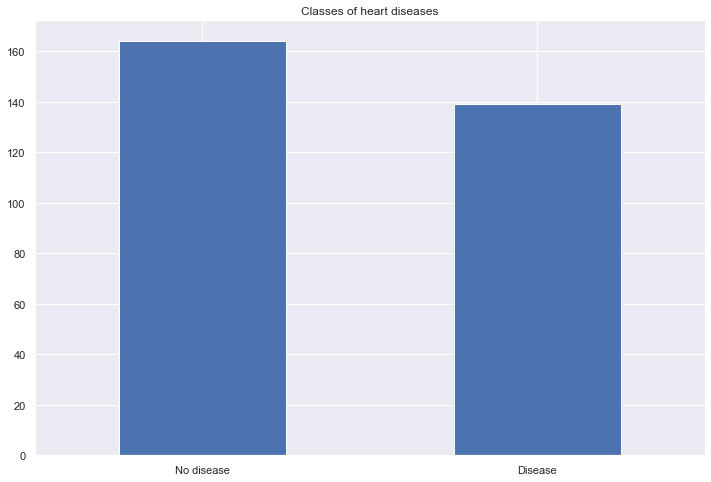

In [75]:
df['disease'].value_counts().plot(kind = 'bar')

plt.title('Classes of heart diseases')
plt.xticks(rotation = 0)

plt.show()

The above diagram depicts that the data set we are working with contains records of more people who have the disease than those who do not have it

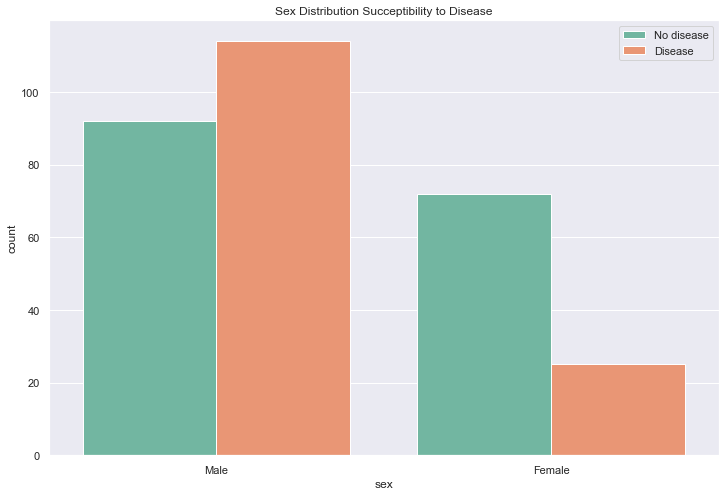

In [76]:
Gender_succeptibility = sns.countplot(x='sex', hue='disease', data=df, palette='Set2')


plt.title('Sex Distribution Succeptibility to Disease')
plt.legend()


plt.show()

Sex Distribution Succeptibility to Disease Barplot shows whether sex is a predisposition to having a heart disease. It shows that more males have the heart disease than females.

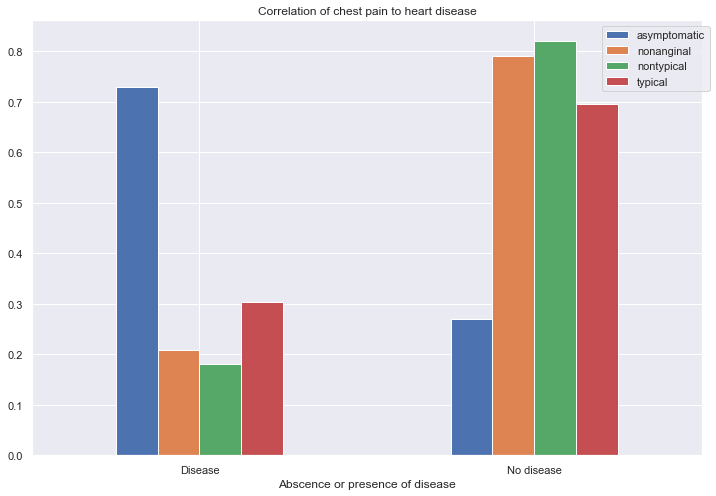

In [77]:
heart_condition = pd.crosstab(df['disease'], df['chest_pain'])

heart_condition.div(heart_condition.sum().astype(float), axis=1).plot(kind='bar', stacked=False)

plt.title('Correlation of chest pain to heart disease')
plt.xlabel('Abscence or presence of disease')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1.02, 1))

Correlation of chest pain to heart disease Barplot intends to establish the relationship between different kind of chest pain to heart disease. It can therefore be inferred that majority of those who had asyptomatic chestpain also had heart disease.Therefore it is safe to say from this dataset that asymptomatic chestpain > typical chestpain > nonanginal > nontypical chestpain

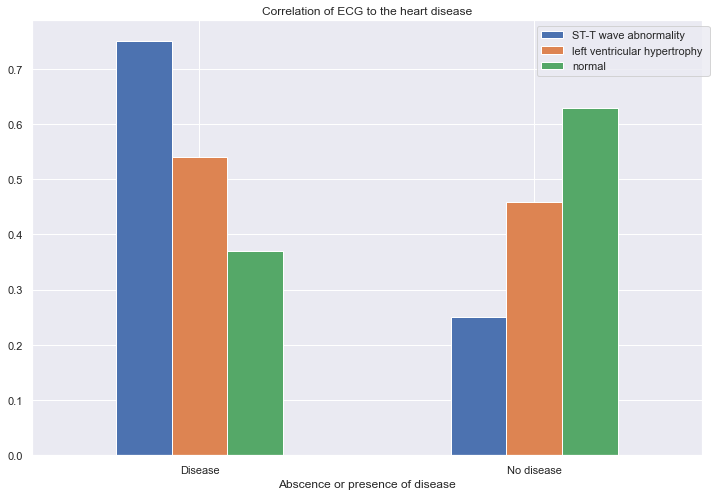

In [78]:
ECG = pd.crosstab(df['disease'], df['rest_ecg'])

ECG.div(ECG.sum().astype(float), axis = 1).plot(kind = 'bar', stacked = False)

plt.title('Correlation of ECG to the heart disease')
plt.xlabel('Abscence or presence of disease')
plt.xticks(rotation = 0)

plt.legend(bbox_to_anchor = (1.02, 1))

Correlation of ECG to the heart disease Barplot attempts to show the relationship between the result of ECG and heart disease. it shows that patients with ST-T wave abnormality are  MORE prone to heart disease, those with left ventricular hypertrophy are also prone to heart disease, while those with normal ECG are not prone to heart disease even though there are several other factors that can lead to them having a heart disease later on. 

No handles with labels found to put in legend.


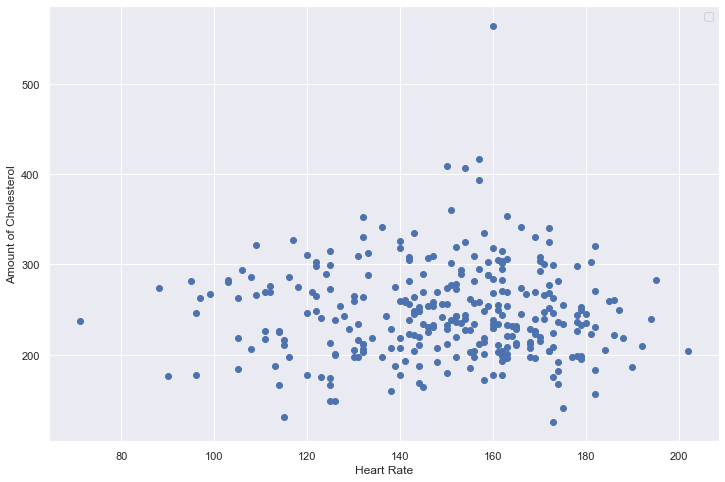

In [79]:
plt.scatter(x = df['max_hr'], y =df['chol'])

plt.xlabel('Heart Rate')
plt.ylabel('Amount of Cholesterol')

plt.legend()
plt.show()

The scatterplot above also attempts to establish a correlation between cholesterol and the heartrate. Even though it is not adequately clustered, we can see that most of the patients with high cholesterol count also have high heart rate which may be a sign of heart disease.

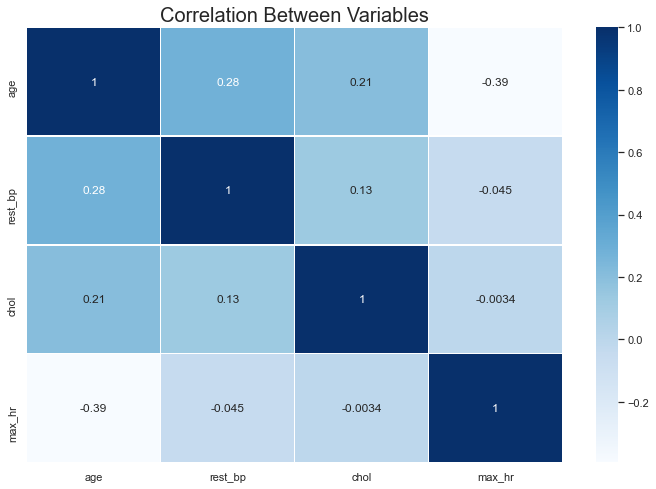

In [80]:
sns.set(rc= {'figure.figsize': (12,8)})
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")

plt.title('Correlation Between Variables', fontsize = 20)

plt.show()

A) ‘age’, ‘oldpeak’, ‘slope’,'exang' shows good positive correlation with disease

B) ‘max_hr’shows a negative correlation with disease

### Filling missing values

I filled the missing values of the object category with mode and the numerical category with the median

In [220]:
df['thal'] = df['thal'].fillna(df['thal'].mode().values[0])

Inspecting the data again

In [119]:
df.isnull().sum()

age           0
sex           0
chest_pain    0
rest_bp       0
chol          0
rest_ecg      0
max_hr        0
thal          0
disease       0
dtype: int64

### DATA PREPROCESSING

In [208]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [209]:
lb = LabelBinarizer()

To build a model, all object datatypes need to be converted into integers. There are several method of doing this
1. Using the get_dummies()
2. Using LabelEncoder followed by OneHotEncoder
3. Using LabelBinarizer

I used two of the above methods

In [210]:
# Using LabelBinarizer()
df['sex'] = lb.fit_transform(df['sex'])

In [221]:
# using label encoder
for i in df.columns:
    if df[i].dtypes == 'object':
        lb_enc = LabelEncoder()
        df[i] = lb_enc.fit_transform(df[i])
df.head()

,age,sex,chest_pain,rest_bp,chol,rest_ecg,max_hr,thal,disease
0,63,1,3,145,233,1,150,0,0
1,67,1,0,160,286,1,108,1,1
2,67,1,0,120,229,1,129,2,1
3,37,1,1,130,250,2,187,1,0
4,41,0,2,130,204,1,172,1,0


In [222]:
df.head()

,age,sex,chest_pain,rest_bp,chol,rest_ecg,max_hr,thal,disease
0,63,1,3,145,233,1,150,0,0
1,67,1,0,160,286,1,108,1,1
2,67,1,0,120,229,1,129,2,1
3,37,1,1,130,250,2,187,1,0
4,41,0,2,130,204,1,172,1,0


In [148]:
def pipelines(age, sex, rest_bp, chol, max_hr, chest_pain, thal, rest_ecg):
    cols = ['age', 'sex', 'rest_bp', 'chol', 'max_hr', 'chest_pain' 'thal', 'rest_ecg']

    feature_list_df = pd.DataFrame(columns=cols)
    feature_list_df['age'] = [age]
    feature_list_df['sex'] = [convert_sex(sex)]
    feature_list_df['rest_bp'] = [rest_bp]
    feature_list_df['chol'] = [chol]
    feature_list_df['max_hr'] = [max_hr]

    if chest_pain == 'Typical':
        feature_list_df['chest_pain_typical'] = 1
    elif chest_pain == 'Non-Anginal':
        feature_list_df['chest_pain_nonanginal'] = 1
    elif chest_pain == 'Non-Typical':
        feature_list_df['chest_pain_nontypical'] = 1
    elif chest_pain == 'Atypical':
        feature_list_df['chest_pain_asymptomatic'] = 1
    if thal == 'Normal':
        feature_list_df['thal_normal'] = 1
    elif thal == 'Fixed':
        feature_list_df['thal_fixed'] = 1
    elif thal == 'Reversable':
        feature_list_df['thal_reversable'] = 1
    if rest_ecg == 'Left Ventricular Hypertrophy ':
        feature_list_df['rest_ecg_left ventricular hypertrophy'] = 1
    elif rest_ecg == 'Normal':
        feature_list_df['rest_ecg_normal'] = 1
    elif rest_ecg == 'ST-T Wave Abnormality':
        feature_list_df['rest_ecg_ST-T wave abnormality'] = 1

    feature_list_df = pd.get_dummies(data=feature_list_df, columns=['chest_pain', 'thal', 'rest_ecg'])
    
    return feature_list_df.fillna(0)




,Fixed_Normal
0,1


Inspect the data again

In [87]:
# Now all datatpes have been converted from object datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         303 non-null    int64 
 1   sex         303 non-null    int32 
 2   chest_pain  303 non-null    uint8 
 3   rest_bp     303 non-null    int64 
 4   chol        303 non-null    int64 
 5   rest_ecg    303 non-null    uint8 
 6   max_hr      303 non-null    int64 
 7   thal        303 non-null    uint8 
 8   disease     303 non-null    object
dtypes: int32(1), int64(4), object(1), uint8(3)
memory usage: 14.0+ KB


## MODEL BUILDING 

In [223]:
X = df.drop('disease', axis=1)
X.shape

(303, 8)

In [224]:
y = df['disease']
y.shape

(303,)

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.15)
                                                    
    
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
                                                    
                                                    

(257, 8)
(46, 8)
(257,)
(46,)


Importing the algorithm to be used for this classification problem

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [228]:
rangreg = RandomForestClassifier()

In [229]:
rangreg.fit(X_train, y_train)

RandomForestClassifier()

In [230]:
y_pred = rangreg.predict(X_test)

In [243]:
age = 19
sex = 'Male'
rest_bp = 120
chol = 300
max_hr = 179
chest_pain = 'Typical'
thal = 'Normal', 'Fixed', 'Reversable'
rest_ecg = 'Normal'

col = ['age', 'sex', 'rest_bp', 'chol', 'max_hr', 'chest_pain', 'thal', 'rest_ecg']



def convert_sex(sex_value):
    sex_dict = {'Male': 1, 'Female': 0}
    sex_val = sex_dict[sex_value]
    return sex_val

def pipelines():

    feature_list_df = pd.DataFrame(columns=col)
    feature_list_df['age'] = [age]
    feature_list_df['sex'] = [convert_sex(sex)]
    feature_list_df['rest_bp'] = [rest_bp]
    feature_list_df['chol'] = [chol]
    feature_list_df['max_hr'] = [max_hr]
    feature_list_df['chest_pain'] = lb_enc.fit_transform([chest_pain])
    feature_list_df['thal'] = lb_enc.fit_transform([thal])
    feature_list_df['rest_ecg'] = lb_enc.fit_transform([rest_ecg])
    
    return feature_list_df.fillna(0)

# feature_list_df = pd.get_dummies(data=feature_list_df, columns=['chest_pain', 'thal', 'rest_ecg'])

ioa = pipelines()

ioa

ValueError: y should be a 1d array, got an array of shape (1, 3) instead.

In [131]:
print(y_test[:4])

179    No disease
228       Disease
111       Disease
246       Disease
Name: disease, dtype: object


In [96]:
print(y_pred[:4])

['No disease' 'Disease' 'No disease' 'No disease']


### MODEL EVALUATION

#### Accuracy score

In [97]:
from sklearn.metrics import accuracy_score

In [233]:
Accuracy_score = round(accuracy_score(y_test, y_pred) * 100)

In [234]:
print('The average score for this heart disease prediction model is {}%'.format(Accuracy_score))

The average score for this heart disease prediction model is 89%


#### F1 score evaluation

In [135]:
from sklearn.metrics import f1_score, classification_report

In [235]:
f1_score1 = round(f1_score(y_test, y_pred, average = 'macro') * 100)

In [236]:
print('The f1 score for this heart disease prediction model is {}%'.format(f1_score1))

The f1 score for this heart disease prediction model is 89%


#### Classification Report Evaluation

In [237]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.86      0.96      0.91        25

    accuracy                           0.89        46
   macro avg       0.90      0.88      0.89        46
weighted avg       0.90      0.89      0.89        46



### CONCLUSION

The heart model presumably did well even though it was trained with a very little number of data. It can predict whether or not a person is prone to having a heart disease based on other independent clinical information. 

In [104]:
import pickle

In [238]:
filename = 'Heart_Pred_model'

In [239]:
outfile = open(filename, 'wb')

In [240]:
pickle.dump(rangreg, outfile)

In [49]:
loaded_model = pickle.load((open(filename, 'rb')))

In [50]:
loaded_model.predict(X_test)

array(['No disease', 'Disease', 'Disease', 'No disease', 'Disease',
       'Disease', 'Disease', 'Disease', 'No disease', 'No disease',
       'No disease', 'No disease', 'Disease', 'Disease', 'Disease',
       'No disease', 'No disease', 'Disease', 'Disease', 'No disease',
       'No disease', 'No disease', 'Disease', 'No disease', 'Disease',
       'No disease', 'No disease', 'Disease', 'Disease', 'No disease',
       'No disease', 'Disease', 'No disease', 'No disease', 'No disease',
       'No disease', 'Disease', 'No disease', 'Disease', 'No disease',
       'Disease', 'No disease', 'Disease', 'No disease', 'No disease',
       'Disease'], dtype=object)